<a href="https://colab.research.google.com/github/Abhinay025/DA_BeginnerProjects/blob/main/Performing_Analysis_of_Meteorological_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
%matplotlib inline

In [ ]:
df=pd.read_csv('weatherHistory.csv')
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  int64  
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  int64  
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(6), int64(2), object(4)
memory usage: 8.8+ MB


In [ ]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [ ]:
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [ ]:
df.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)        int64
Visibility (km)             float64
Loud Cover                    int64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

In [ ]:
df['Formatted Date']=pd.to_datetime(df['Formatted Date'],utc=True)
#Using infer datetime it will automaticall detect format and convert the column to datetime

In [ ]:
df.dtypes

Formatted Date              datetime64[ns, UTC]
Summary                                  object
Precip Type                              object
Temperature (C)                         float64
Apparent Temperature (C)                float64
Humidity                                float64
Wind Speed (km/h)                       float64
Wind Bearing (degrees)                    int64
Visibility (km)                         float64
Loud Cover                                int64
Pressure (millibars)                    float64
Daily Summary                            object
dtype: object

In [ ]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


In [ ]:
df['Formatted Date']

0       2006-03-31 22:00:00+00:00
1       2006-03-31 23:00:00+00:00
2       2006-04-01 00:00:00+00:00
3       2006-04-01 01:00:00+00:00
4       2006-04-01 02:00:00+00:00
                   ...           
96448   2016-09-09 17:00:00+00:00
96449   2016-09-09 18:00:00+00:00
96450   2016-09-09 19:00:00+00:00
96451   2016-09-09 20:00:00+00:00
96452   2016-09-09 21:00:00+00:00
Name: Formatted Date, Length: 96453, dtype: datetime64[ns, UTC]

In [ ]:
#Data is in hourly period of time. so, for better analysis we need to resample our data monthly
df=df.set_index('Formatted Date')

In [ ]:
df_month_sampling=df[['Apparent Temperature (C)','Humidity']].resample('M').mean()
df_month_sampling.head()

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-31 00:00:00+00:00,-4.050000,0.890000
2006-01-31 00:00:00+00:00,-4.173708,0.834610
2006-02-28 00:00:00+00:00,-2.990716,0.843467
2006-03-31 00:00:00+00:00,1.969780,0.778737
2006-04-30 00:00:00+00:00,12.098827,0.728625


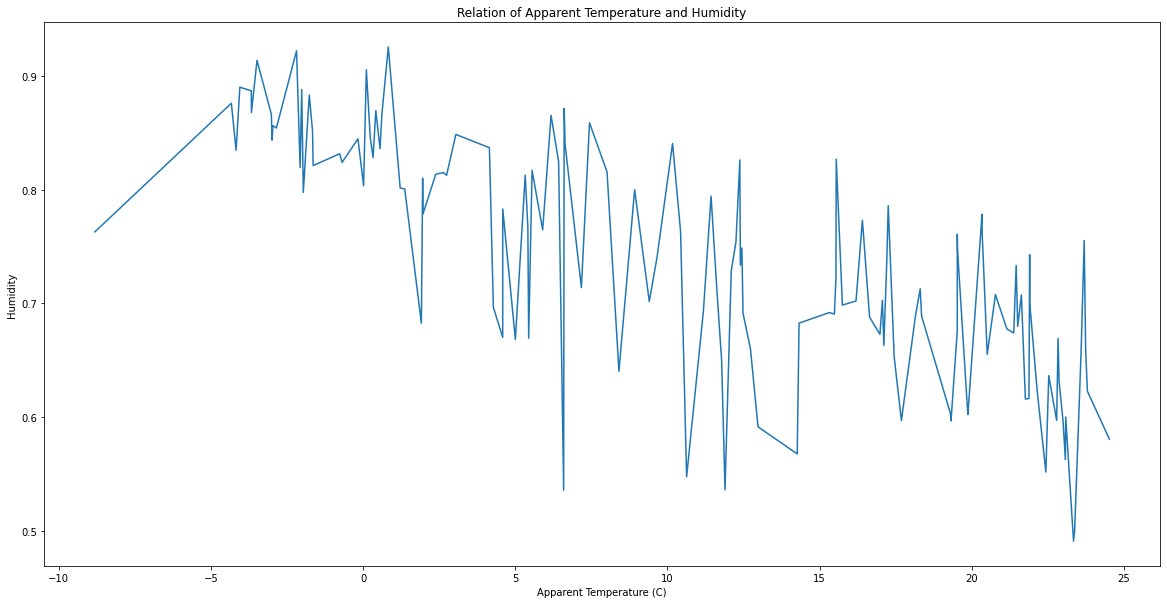

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Relation of Apparent Temperature and Humidity")
sns.lineplot(x="Apparent Temperature (C)",y="Humidity",data=df_month_sampling)

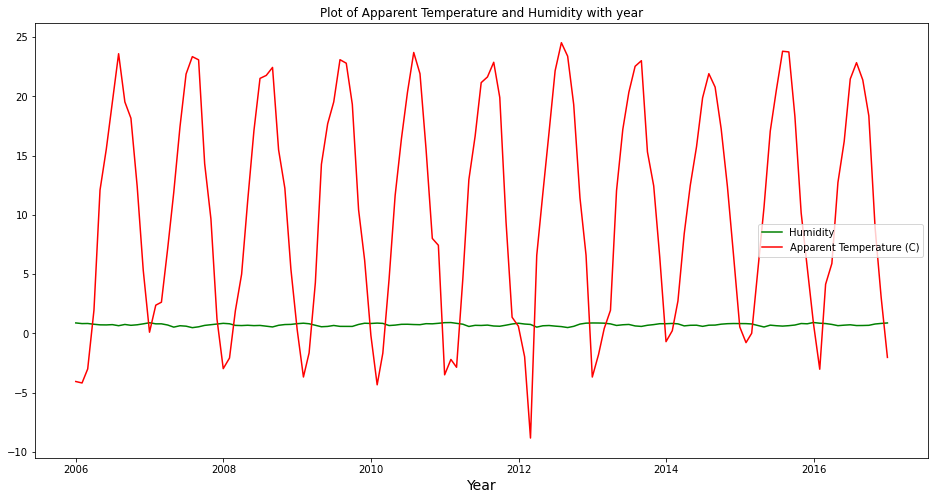

In [ ]:
#Plot of Apparent Temperature and Humidity with year
plt.figure(figsize=(16,8))
plt.title("Plot of Apparent Temperature and Humidity with year")
plt.plot(df_month_sampling['Humidity'],label='Humidity',color='green')
plt.plot(df_month_sampling['Apparent Temperature (C)'],label='Apparent Temperature (C)',color='red')
plt.xlabel("Year",fontsize="14")
plt.legend(loc=5,fontsize=10)

In [ ]:
#Resampling data from hourly to monthly, then comparing the same month over the 10 year period.
jan=df_month_sampling[df_month_sampling.index.month==1]
feb=df_month_sampling[df_month_sampling.index.month==2]
march=df_month_sampling[df_month_sampling.index.month==3]
april=df_month_sampling[df_month_sampling.index.month==4]
may=df_month_sampling[df_month_sampling.index.month==5]
june=df_month_sampling[df_month_sampling.index.month==6]
july=df_month_sampling[df_month_sampling.index.month==7]
august=df_month_sampling[df_month_sampling.index.month==8]
sept=df_month_sampling[df_month_sampling.index.month==9]
octo=df_month_sampling[df_month_sampling.index.month==10]
nov=df_month_sampling[df_month_sampling.index.month==11]
dec=df_month_sampling[df_month_sampling.index.month==12]

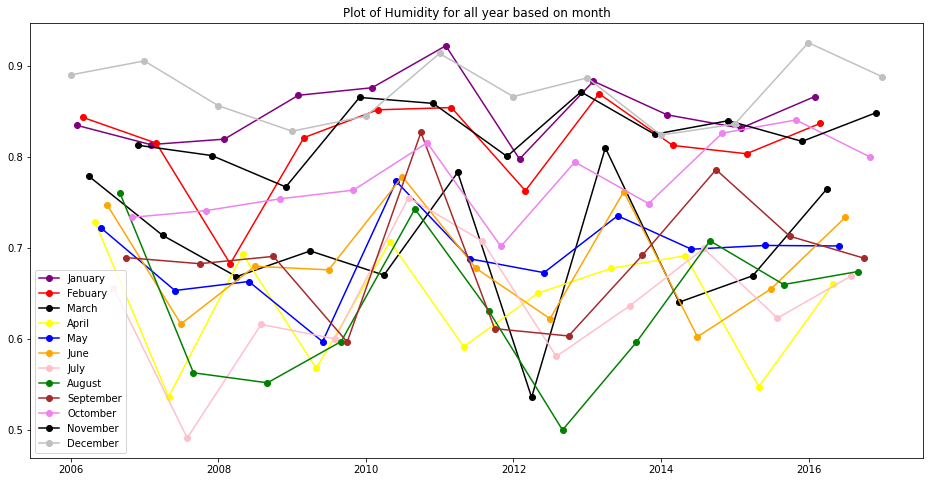

In [ ]:
#Plot of Humidity for all year based on month
plt.figure(figsize=(16,8))
plt.title("Plot of Humidity for all year based on month")
plt.plot(jan['Humidity'],label='January',color='Purple',marker='o')
plt.plot(feb['Humidity'],label='Febuary',color='red',marker='o')
plt.plot(march['Humidity'],label='March',color='black',marker='o')
plt.plot(april['Humidity'],label='April',color='yellow',marker='o')
plt.plot(may['Humidity'],label='May',color='blue',marker='o')
plt.plot(june['Humidity'],label='June',color='orange',marker='o')
plt.plot(july['Humidity'],label='July',color='pink',marker='o')
plt.plot(august['Humidity'],label='August',color='green',marker='o')
plt.plot(sept['Humidity'],label='September',color='brown',marker='o')
plt.plot(octo['Humidity'],label='Octomber',color='violet',marker='o')
plt.plot(nov['Humidity'],label='November',color='black',marker='o')
plt.plot(dec['Humidity'],label='December',color='silver',marker='o')

plt.legend(loc=0,fontsize=10)

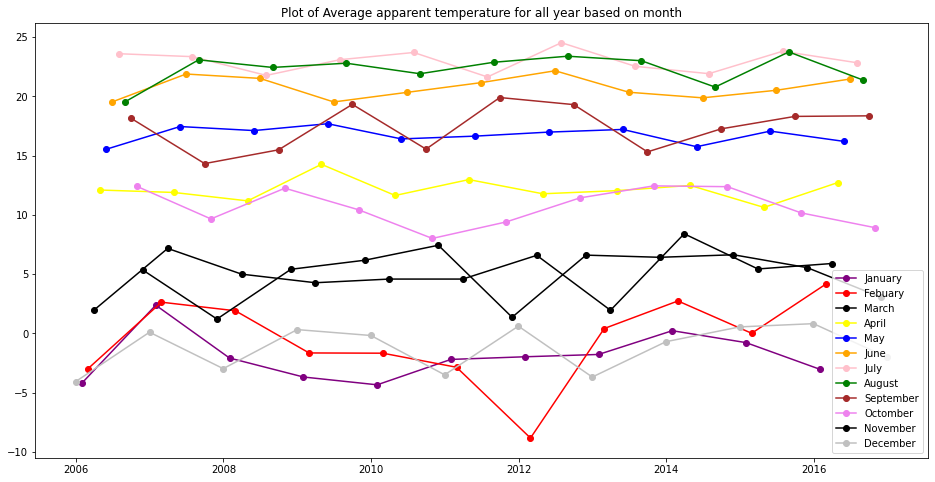

In [ ]:
#Plot of Average apparent temperature for all year based on month
plt.figure(figsize=(16,8))
plt.title("Plot of Average apparent temperature for all year based on month")
plt.plot(jan['Apparent Temperature (C)'],label='January',color='Purple',marker='o')
plt.plot(feb['Apparent Temperature (C)'],label='Febuary',color='red',marker='o')
plt.plot(march['Apparent Temperature (C)'],label='March',color='black',marker='o')
plt.plot(april['Apparent Temperature (C)'],label='April',color='yellow',marker='o')
plt.plot(may['Apparent Temperature (C)'],label='May',color='blue',marker='o')
plt.plot(june['Apparent Temperature (C)'],label='June',color='orange',marker='o')
plt.plot(july['Apparent Temperature (C)'],label='July',color='pink',marker='o')
plt.plot(august['Apparent Temperature (C)'],label='August',color='green',marker='o')
plt.plot(sept['Apparent Temperature (C)'],label='September',color='brown',marker='o')
plt.plot(octo['Apparent Temperature (C)'],label='Octomber',color='violet',marker='o')
plt.plot(nov['Apparent Temperature (C)'],label='November',color='black',marker='o')
plt.plot(dec['Apparent Temperature (C)'],label='December',color='silver',marker='o')

plt.legend(loc=0,fontsize=10)

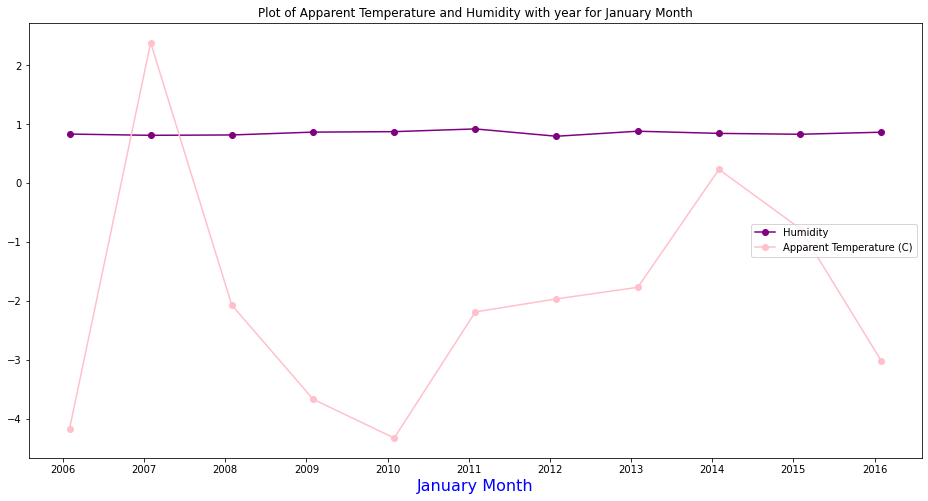

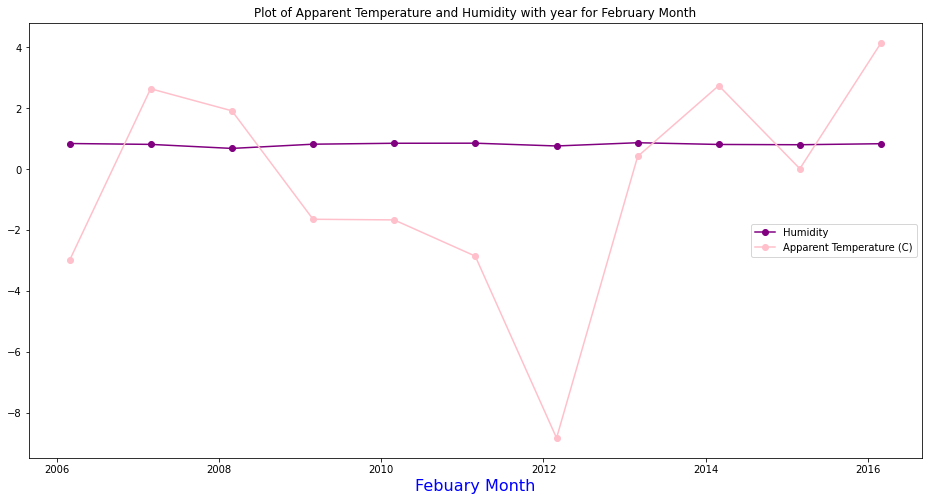

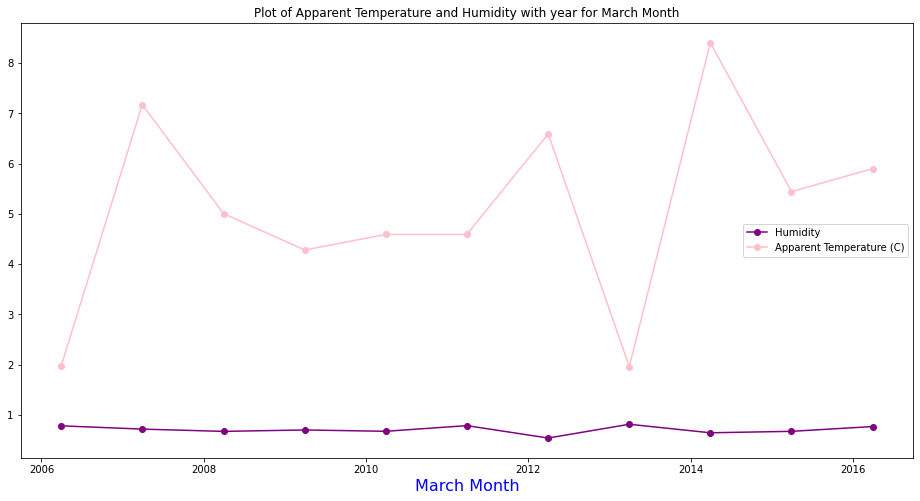

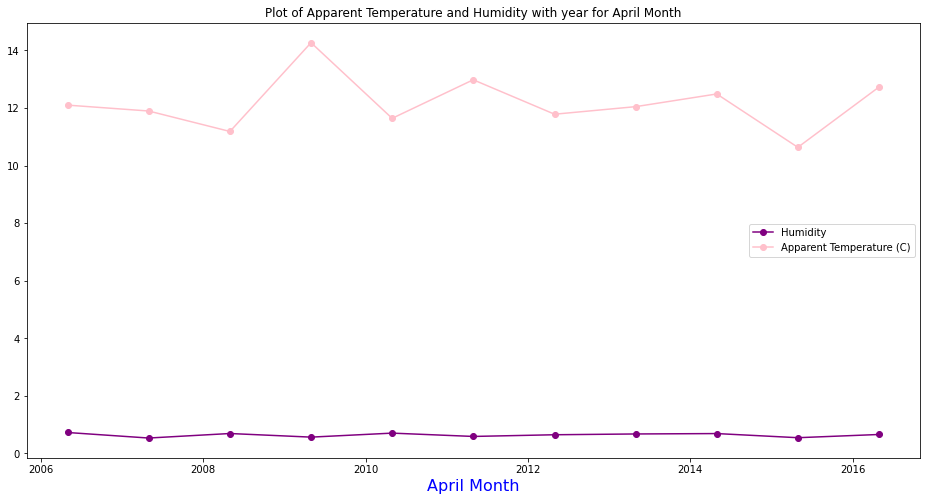

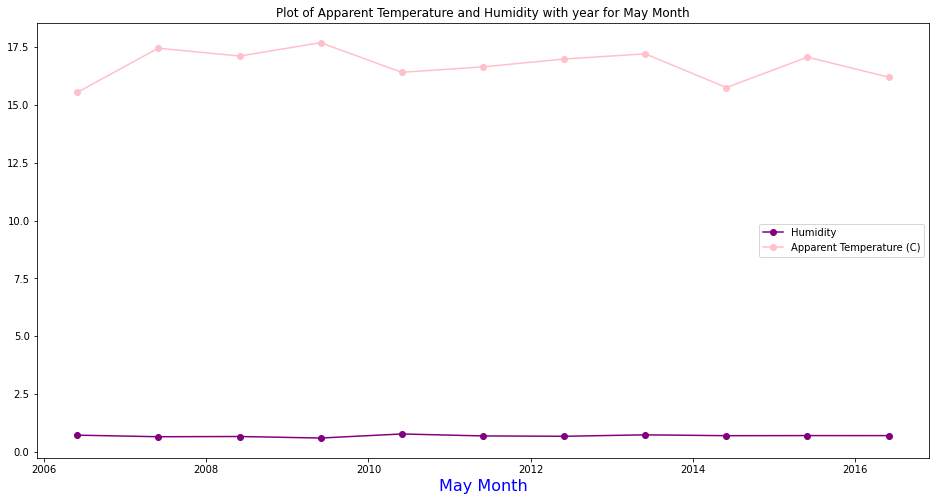

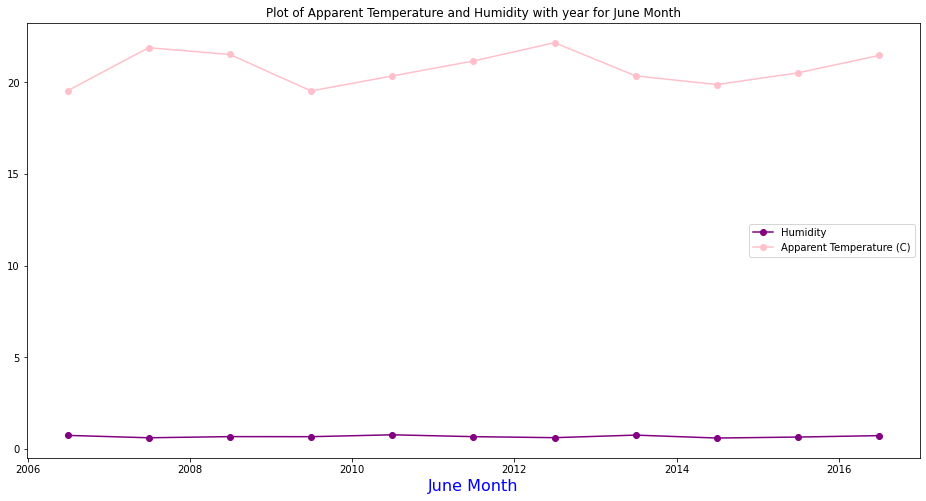

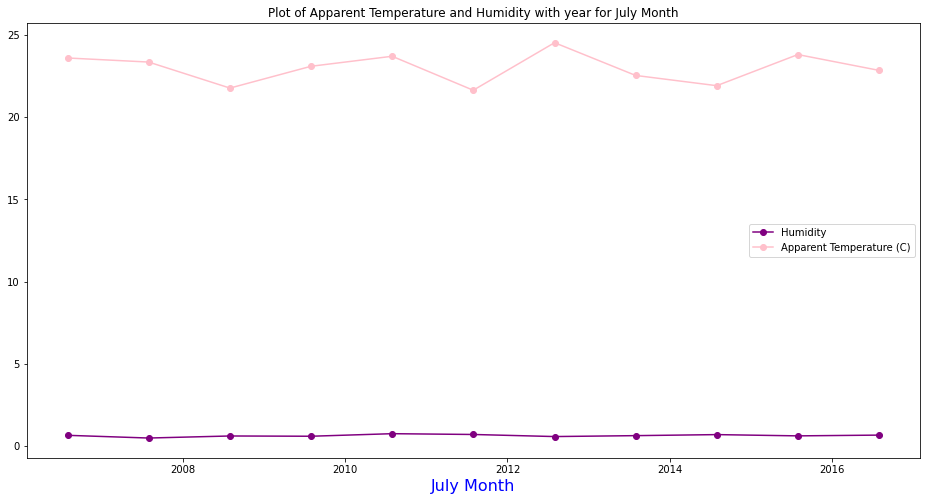

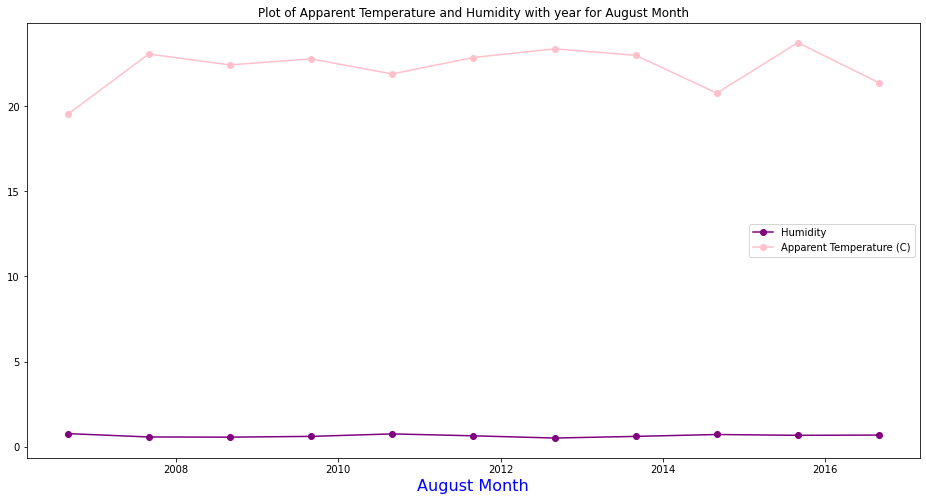

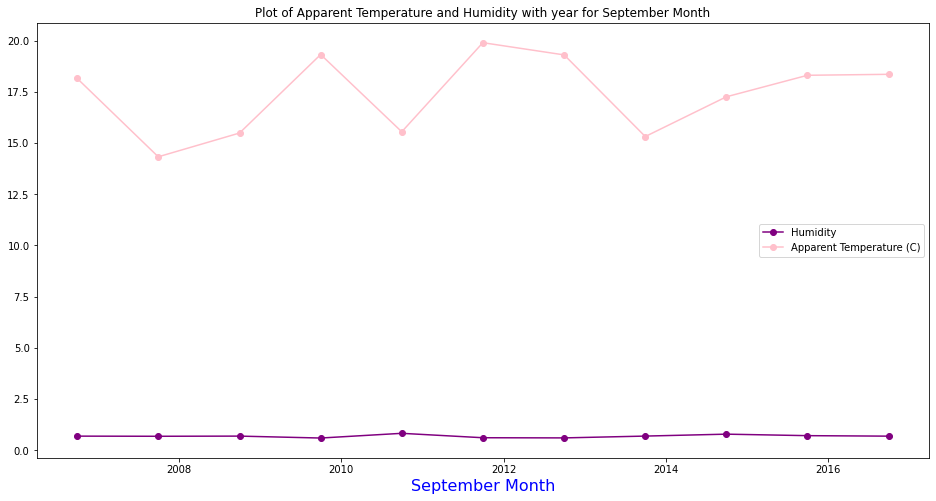

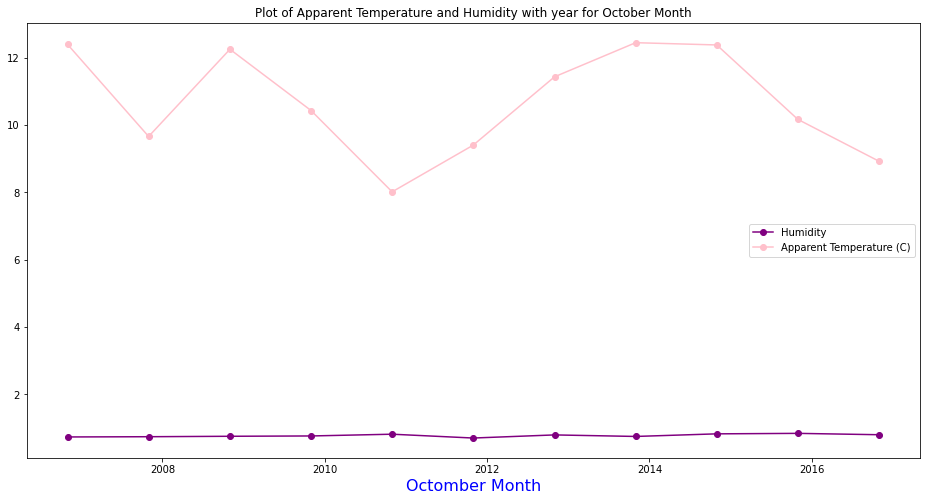

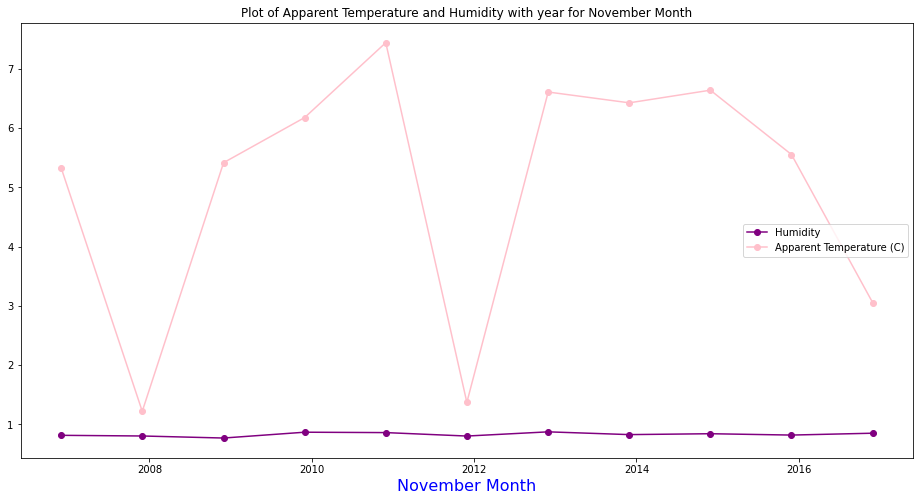

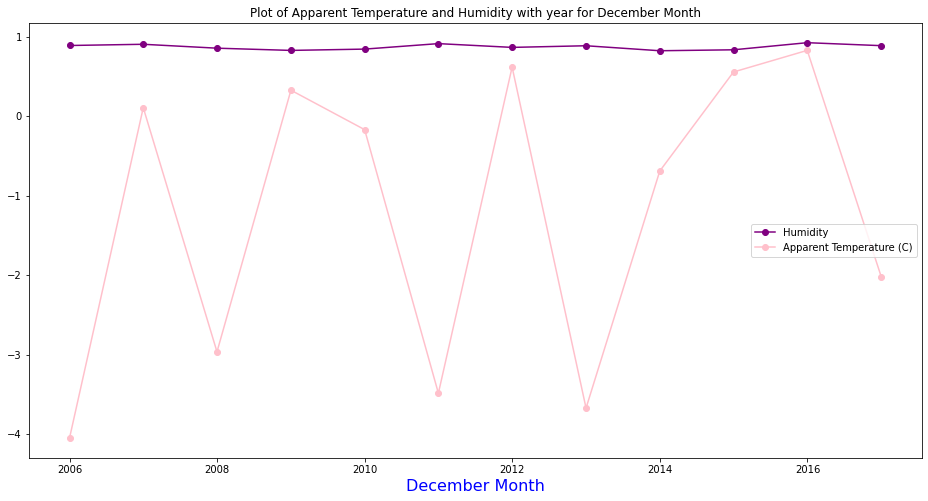

In [ ]:
#Ploting of individual month for humidity and temperature
plt.figure(figsize=(16,8))
plt.title("Plot of Apparent Temperature and Humidity with year for January Month")
plt.plot(jan['Humidity'],label='Humidity',color='Purple',marker='o')
plt.plot(jan['Apparent Temperature (C)'],label='Apparent Temperature (C)',color='pink',marker='o')
plt.xlabel('January Month',fontsize=16,color='Blue')
plt.legend(loc=5,fontsize=10)

plt.figure(figsize=(16,8))
plt.title("Plot of Apparent Temperature and Humidity with year for February Month")
plt.plot(feb['Humidity'],label='Humidity',color='Purple',marker='o')
plt.plot(feb['Apparent Temperature (C)'],label='Apparent Temperature (C)',color='pink',marker='o')
plt.xlabel('Febuary Month',fontsize=16,color='Blue')
plt.legend(loc=5,fontsize=10)

plt.figure(figsize=(16,8))
plt.title("Plot of Apparent Temperature and Humidity with year for March Month")
plt.plot(march['Humidity'],label='Humidity',color='Purple',marker='o')
plt.plot(march['Apparent Temperature (C)'],label='Apparent Temperature (C)',color='pink',marker='o')
plt.xlabel('March Month',fontsize=16,color='Blue')
plt.legend(loc=5,fontsize=10)

plt.figure(figsize=(16,8))
plt.title("Plot of Apparent Temperature and Humidity with year for April Month")
plt.plot(april['Humidity'],label='Humidity',color='Purple',marker='o')
plt.plot(april['Apparent Temperature (C)'],label='Apparent Temperature (C)',color='pink',marker='o')
plt.xlabel('April Month',fontsize=16,color='Blue')
plt.legend(loc=5,fontsize=10)

plt.figure(figsize=(16,8))
plt.title("Plot of Apparent Temperature and Humidity with year for May Month")
plt.plot(may['Humidity'],label='Humidity',color='Purple',marker='o')
plt.plot(may['Apparent Temperature (C)'],label='Apparent Temperature (C)',color='pink',marker='o')
plt.xlabel('May Month',fontsize=16,color='Blue')
plt.legend(loc=5,fontsize=10)

plt.figure(figsize=(16,8))
plt.title("Plot of Apparent Temperature and Humidity with year for June Month")
plt.plot(june['Humidity'],label='Humidity',color='Purple',marker='o')
plt.plot(june['Apparent Temperature (C)'],label='Apparent Temperature (C)',color='pink',marker='o')
plt.xlabel('June Month',fontsize=16,color='Blue')
plt.legend(loc=5,fontsize=10)

plt.figure(figsize=(16,8))
plt.title("Plot of Apparent Temperature and Humidity with year for July Month")
plt.plot(july['Humidity'],label='Humidity',color='Purple',marker='o')
plt.plot(july['Apparent Temperature (C)'],label='Apparent Temperature (C)',color='pink',marker='o')
plt.xlabel('July Month',fontsize=16,color='Blue')
plt.legend(loc=5,fontsize=10)

plt.figure(figsize=(16,8))
plt.title("Plot of Apparent Temperature and Humidity with year for August Month")
plt.plot(august['Humidity'],label='Humidity',color='Purple',marker='o')
plt.plot(august['Apparent Temperature (C)'],label='Apparent Temperature (C)',color='pink',marker='o')
plt.xlabel('August Month',fontsize=16,color='Blue')
plt.legend(loc=5,fontsize=10)

plt.figure(figsize=(16,8))
plt.title("Plot of Apparent Temperature and Humidity with year for September Month")
plt.plot(sept['Humidity'],label='Humidity',color='Purple',marker='o')
plt.plot(sept['Apparent Temperature (C)'],label='Apparent Temperature (C)',color='pink',marker='o')
plt.xlabel('September Month',fontsize=16,color='Blue')
plt.legend(loc=5,fontsize=10)

plt.figure(figsize=(16,8))
plt.title("Plot of Apparent Temperature and Humidity with year for October Month")
plt.plot(octo['Humidity'],label='Humidity',color='Purple',marker='o')
plt.plot(octo['Apparent Temperature (C)'],label='Apparent Temperature (C)',color='pink',marker='o')
plt.xlabel('Octomber Month',fontsize=16,color='Blue')
plt.legend(loc=5,fontsize=10)

plt.figure(figsize=(16,8))
plt.title("Plot of Apparent Temperature and Humidity with year for November Month")
plt.plot(nov['Humidity'],label='Humidity',color='Purple',marker='o')
plt.plot(nov['Apparent Temperature (C)'],label='Apparent Temperature (C)',color='pink',marker='o')
plt.xlabel('November Month',fontsize=16,color='Blue')
plt.legend(loc=5,fontsize=10)


plt.figure(figsize=(16,8))
plt.title("Plot of Apparent Temperature and Humidity with year for December Month")
plt.plot(dec['Humidity'],label='Humidity',color='Purple',marker='o')
plt.plot(dec['Apparent Temperature (C)'],label='Apparent Temperature (C)',color='pink',marker='o')
plt.xlabel('December Month',fontsize=16,color='Blue')
plt.legend(loc=5,fontsize=10)